In [348]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

## Importing the Dataset

First, we will import the CIFAR10 dataset, which already has 50,000 training images, and 10,000 test images. There are 10 catagories, which we will label below as well

In [290]:
(x_train_default, y_train_default),(x_validation, y_validation1) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

We will use the test images as the validation set, and randomly extract 20% of the training set for 10,000 images to be used in the training set for this assignment:

In [291]:
x_train,x_test,y_train1,y_test1 = train_test_split(x_train_default, y_train_default,test_size = 0.8,random_state = 100)

Now, lets take a look at the sizes of our training and validation sets:

In [292]:
print("Training Dataset ", x_train.shape)
print("Test Dataset: ", x_test.shape)
print("Validation Dataset: ", x_validation.shape)

Training Dataset  (10000, 32, 32, 3)
Test Dataset:  (40000, 32, 32, 3)
Validation Dataset:  (10000, 32, 32, 3)


In [293]:
print("Training Dataset ", y_train.shape)
print("Test Dataset: ", y_test.shape)
print("Validation Dataset: ", y_validation.shape)

Training Dataset  (10000, 10)
Test Dataset:  (40000, 10)
Validation Dataset:  (10000, 10)


We can see 10,000 images in both the train and validation set of 32x32 RGB images. And our test set has 40,000 images.

## Preprocessing 

As part of the **preprocessing** stage, we will normalize the values to be between 0-1. Currently, the RGB values are between 0-255.

In [294]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_validation = x_validation.astype('float32')/255

We will also make all the labels categorical through one hot encoding:

In [295]:
y_train = to_categorical(y_train1, 10)
y_test = to_categorical(y_test1, 10)
y_validation=to_categorical(y_validation1, 10)

Prior to creating our networks, we will split the training set into batch sizes of 32, as per assignment requirements:

In [296]:
train_batch = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_batch = tf.data.Dataset.from_tensor_slices((x_test,y_test))
validation_batch = tf.data.Dataset.from_tensor_slices((x_validation,y_validation))

## Multi-Layer Perceptron

We will create a multi-layer perceptron of the following sequence:

Input Layer &rarr; first Fully Connected (Dense) Layer (512 nodes and sigmoid activation function) &rarr; second Fully Connected (Dense) Layer (512 nodes and sigmoid activation function) &rarr; Output Layer (10 nodes and softmax activation function) 

For the output layer, we choose 10 nodes, as there are 10 possible catagories for the datapoints to be classified into. Softmax is chosen as the activation function in this layer as it is a multi-class classification. 

In [297]:
#Creating a new MLP model
MLP=Sequential()
#Flatten the data to the input layer 
MLP.add(Flatten(input_shape=(32,32,3)))
#Adding the first dense fully connected layer 
MLP.add(Dense(512,activation='sigmoid'))
#Adding the second dense fully connected layer 
MLP.add(Dense(512,activation='sigmoid'))
#Adding the final output layer
MLP.add(Dense(10,activation='softmax'))

For the weight training, we will use the Adam Optimizer as per assignment specifications. It is is recommended as the default optimizer for most of the applications due to the superior performance thanks to its optimized gradient decsent. 

We choose the loss function for our analysis to be the **categorical cross entropy**, which is commonly used to measure the performance of a multi-class classsification by comparing differences between different probability distributions. Categorical cross entropy is a combination of Softmax activation plus a Cross-Entropy loss. 

In [298]:
MLP.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Now let's take a look at the summary of the model so far:

In [299]:
MLP.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 3072)              0         
                                                                 
 dense_145 (Dense)           (None, 512)               1573376   
                                                                 
 dense_146 (Dense)           (None, 512)               262656    
                                                                 
 dense_147 (Dense)           (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


The Output shape column shows us that the flatten layer 'rolled out' the 3D shape of 32x32x3 to 3072 1D features to be fed into the network, and the output shape is 10 nodes, as there are 10 class possibilities. 

Now, we can fit our model with the training batches created earlier, and the validation set with 5 epochs

In [300]:
history_MLP = MLP.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))

Epoch 1/5
313/313 [==============================] - 7s 19ms/step - loss: 2.0640 - accuracy: 0.2370 - val_loss: 2.0095 - val_accuracy: 0.2616
Epoch 2/5
313/313 [==============================] - 7s 23ms/step - loss: 1.9066 - accuracy: 0.3050 - val_loss: 1.9115 - val_accuracy: 0.3145
Epoch 3/5
313/313 [==============================] - 7s 23ms/step - loss: 1.8375 - accuracy: 0.3335 - val_loss: 1.8924 - val_accuracy: 0.3177
Epoch 4/5
313/313 [==============================] - 7s 21ms/step - loss: 1.7940 - accuracy: 0.3477 - val_loss: 1.8455 - val_accuracy: 0.3295
Epoch 5/5
313/313 [==============================] - 7s 22ms/step - loss: 1.7627 - accuracy: 0.3582 - val_loss: 1.8329 - val_accuracy: 0.3362


We can see the best training accuracy achieved at the final epoch is 36.84% and validation accuracy was 34.99%. 

Now, we will plot graphs of the training accuracy and validation accuracy with the increase in epochs in one plot to view the trends:

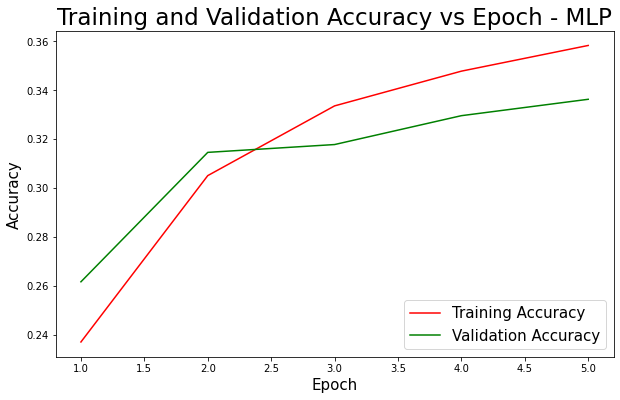

In [301]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5],history_MLP.history['accuracy'],color='red')
plt.plot([1,2,3,4,5],history_MLP.history['val_accuracy'],color='green')
plt.title('Training and Validation Accuracy vs Epoch - MLP',fontsize='23')
plt.ylabel('Accuracy',fontsize='15')
plt.xlabel('Epoch',fontsize='15')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right',fontsize='15')
plt.show()

The graphs above show us the accuracy increases with the epochs. Initially, there is a faster rise, but after the second epoch, there is a steady increase in accuracy. The gap between the training accuracy over the validation accuracy shows us we are not at a risk of overfitting in this model. 

We will now plot a similar graph for the trend in validation and training loss with increase in epochs:

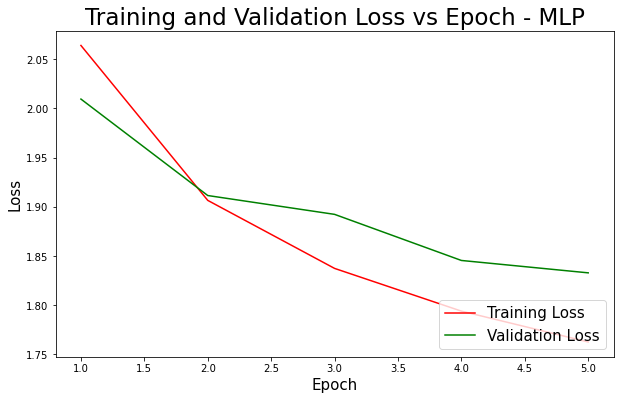

In [302]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5],history_MLP.history['loss'],color='red')
plt.plot([1,2,3,4,5],history_MLP.history['val_loss'],color='green')
plt.title('Training and Validation Loss vs Epoch - MLP',fontsize='23')
plt.ylabel('Loss',fontsize='15')
plt.xlabel('Epoch',fontsize='15')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right',fontsize='15')
plt.show()

As expected, we observe that the loss decreases as we increase epochs, and the validation loss ends up higher than the training loss. 

As a final evaluation, we will find the accuracy on the unseen test set to be 34.5%

In [303]:
test_loss, test_accuracy = MLP.evaluate(x_test,y_test) 
test_accuracy*100

1250/1250 [==============================] - 12s 9ms/step - loss: 1.8420 - accuracy: 0.3303


33.02749991416931

The test accuracy obtained by this MLP was 34.5%

## Updating MLP Model

Now, we will make some changes to the MLP model by first doubling the number of nodes in our two hidden layers from 524 to 1024, and check the accuracy

In [304]:
#Creating a new MLP model with more nodes in our hidden layers
MLP2=Sequential()
#Flatten the data to the input layer 
MLP2.add(Flatten(input_shape=(32,32,3)))
#Adding the first dense fully connected layer 
MLP2.add(Dense(1024,activation='sigmoid'))
#Adding the second dense fully connected layer 
MLP2.add(Dense(1024,activation='sigmoid'))
#Adding the final output layer
MLP2.add(Dense(10,activation='softmax'))
#Compile and evaluate:
MLP2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_MLP2 = MLP2.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))
test_loss2, test_accuracy2 = MLP2.evaluate(x_test,y_test)
test_accuracy2*100

Epoch 1/5
313/313 [==============================] - 13s 37ms/step - loss: 2.1135 - accuracy: 0.2248 - val_loss: 2.0344 - val_accuracy: 0.2416
Epoch 2/5
313/313 [==============================] - 12s 37ms/step - loss: 1.9235 - accuracy: 0.2965 - val_loss: 1.9359 - val_accuracy: 0.2819
Epoch 3/5
313/313 [==============================] - 11s 35ms/step - loss: 1.8555 - accuracy: 0.3228 - val_loss: 1.9346 - val_accuracy: 0.3154
Epoch 4/5
313/313 [==============================] - 12s 38ms/step - loss: 1.8054 - accuracy: 0.3417 - val_loss: 1.8655 - val_accuracy: 0.3302
Epoch 5/5
1250/1250 [==============================] - 16s 13ms/step - loss: 1.8392 - accuracy: 0.3315


33.15249979496002

Now, we will increase the accuracy to 2048:

In [305]:
#Creating a new MLP model with more nodes in our hidden layers
MLP3=Sequential()
#Flatten the data to the input layer 
MLP3.add(Flatten(input_shape=(32,32,3)))
#Adding the first dense fully connected layer 
MLP3.add(Dense(2048,activation='sigmoid'))
#Adding the second dense fully connected layer 
MLP3.add(Dense(2048,activation='sigmoid'))
#Adding the final output layer
MLP3.add(Dense(10,activation='softmax'))
#Compile and evaluate:
MLP3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_MLP3 = MLP3.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))
test_loss3, test_accuracy3 = MLP3.evaluate(x_test,y_test) 
test_accuracy3*100

Epoch 1/5
313/313 [==============================] - 28s 87ms/step - loss: 2.2476 - accuracy: 0.1910 - val_loss: 2.1265 - val_accuracy: 0.2093
Epoch 2/5
313/313 [==============================] - 27s 86ms/step - loss: 1.9899 - accuracy: 0.2728 - val_loss: 2.0171 - val_accuracy: 0.2578
Epoch 3/5
313/313 [==============================] - 27s 86ms/step - loss: 1.9093 - accuracy: 0.3034 - val_loss: 1.9625 - val_accuracy: 0.2594
Epoch 4/5
313/313 [==============================] - 26s 83ms/step - loss: 1.8532 - accuracy: 0.3184 - val_loss: 1.9044 - val_accuracy: 0.3109
Epoch 5/5
1250/1250 [==============================] - 23s 18ms/step - loss: 1.8690 - accuracy: 0.3121


31.20500147342682

Now, let's try decreasing the halving the number of neurons from the original 524 to 256:

In [306]:
#Creating a new MLP model with more nodes in our hidden layers
MLP4=Sequential()
#Flatten the data to the input layer 
MLP4.add(Flatten(input_shape=(32,32,3)))
#Adding the first dense fully connected layer 
MLP4.add(Dense(256,activation='sigmoid'))
#Adding the second dense fully connected layer 
MLP4.add(Dense(256,activation='sigmoid'))
#Adding the final output layer
MLP4.add(Dense(10,activation='softmax'))
#Compile and evaluate:
MLP4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_MLP4 = MLP4.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))
test_loss4, test_accuracy4 = MLP4.evaluate(x_test,y_test) 
test_accuracy4*100

Epoch 1/5
313/313 [==============================] - 6s 16ms/step - loss: 2.0582 - accuracy: 0.2334 - val_loss: 2.0078 - val_accuracy: 0.2820
Epoch 2/5
313/313 [==============================] - 4s 13ms/step - loss: 1.9083 - accuracy: 0.3012 - val_loss: 1.9179 - val_accuracy: 0.3104
Epoch 3/5
313/313 [==============================] - 4s 13ms/step - loss: 1.8386 - accuracy: 0.3280 - val_loss: 1.8777 - val_accuracy: 0.3190
Epoch 4/5
313/313 [==============================] - 4s 12ms/step - loss: 1.7938 - accuracy: 0.3458 - val_loss: 1.8328 - val_accuracy: 0.3382
Epoch 5/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8070 - accuracy: 0.3450


34.50250029563904

To visualize the trends in accuracy over the change in number of nodes, we will produce a plot:

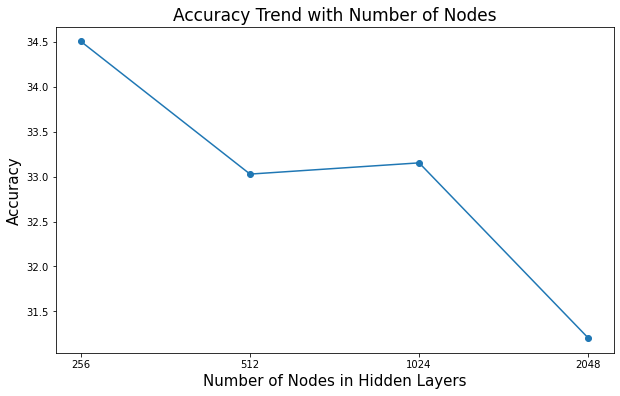

In [307]:
a=[test_accuracy4*100,test_accuracy*100,test_accuracy2*100,test_accuracy3*100]
b=['256','512','1024','2048']
plt.figure(figsize=(10, 6))
plt.plot(b,a,marker='o')
plt.title('Accuracy Trend with Number of Nodes',fontsize=17)
plt.xlabel('Number of Nodes in Hidden Layers',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.show()

The effect of changing number of nodes on overall accuracy is tricky in machine learning. A delicate balance is required because if a really small quantity of neurons is chosen, it will lead to underfitting and high statistical bias. And if too many neurons are chosen, it may lead to overfitting, high variance, and increases the time it takes to train the network. 

In this case, we see that increasing the number of nodes actually seems to have a detrimental effect on the test accuracy, as accuracy more or less decreases with increase of number of nodes. Thus, we conclude the initial chosen 512 number of nodes per hidden layer is the best option. 

We will take that number of nodes forward to changing the number of hidden layers and analyze if that has any effect on the accuracy of the model. We will try a range of number of hidden layers, from 2 to 5 to 10 to 15:

In [308]:
#Creating a new MLP model with 5 hidden layers
MLP5=Sequential()
#Flatten the data to the input layer 
MLP5.add(Flatten(input_shape=(32,32,3)))
#Adding 5 dense fully connected layers:
for i in range (5):   
    MLP5.add(Dense(512,activation='sigmoid'))
#Adding the final fully connected output layer 
MLP5.add(Dense(10,activation='softmax'))
MLP5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_MLP5 = MLP5.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))
test_loss5, test_accuracy5 = MLP5.evaluate(x_test,y_test)
test_accuracy5*100

Epoch 1/5
313/313 [==============================] - 14s 40ms/step - loss: 2.2052 - accuracy: 0.1471 - val_loss: 2.1241 - val_accuracy: 0.1519
Epoch 2/5
313/313 [==============================] - 12s 39ms/step - loss: 2.1056 - accuracy: 0.1741 - val_loss: 2.0896 - val_accuracy: 0.1802
Epoch 3/5
313/313 [==============================] - 13s 40ms/step - loss: 2.0864 - accuracy: 0.1781 - val_loss: 2.1116 - val_accuracy: 0.1778
Epoch 4/5
313/313 [==============================] - 13s 40ms/step - loss: 2.0717 - accuracy: 0.1847 - val_loss: 2.0617 - val_accuracy: 0.1921
Epoch 5/5
1250/1250 [==============================] - 17s 14ms/step - loss: 2.0538 - accuracy: 0.2007


20.07250040769577

In [309]:
#Creating a new MLP model with 10 hidden layers
MLP6=Sequential()
#Flatten the data to the input layer 
MLP6.add(Flatten(input_shape=(32,32,3)))
#Adding 10 dense fully connected layers:
for i in range (10):   
    MLP6.add(Dense(512,activation='sigmoid'))
#Adding the final fully connected output layer 
MLP6.add(Dense(10,activation='softmax'))
MLP6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_MLP6 = MLP6.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))
test_loss6, test_accuracy6 = MLP6.evaluate(x_test,y_test)
test_accuracy6*100

Epoch 1/5
313/313 [==============================] - 20s 60ms/step - loss: 2.3413 - accuracy: 0.0970 - val_loss: 2.3194 - val_accuracy: 0.1000
Epoch 2/5
313/313 [==============================] - 20s 63ms/step - loss: 2.3323 - accuracy: 0.0963 - val_loss: 2.3191 - val_accuracy: 0.1000
Epoch 3/5
313/313 [==============================] - 20s 64ms/step - loss: 2.3320 - accuracy: 0.0955 - val_loss: 2.3188 - val_accuracy: 0.1000
Epoch 4/5
313/313 [==============================] - 19s 62ms/step - loss: 2.3316 - accuracy: 0.0956 - val_loss: 2.3184 - val_accuracy: 0.1000
Epoch 5/5
1250/1250 [==============================] - 27s 22ms/step - loss: 2.3177 - accuracy: 0.1006


10.055000334978104

In [310]:
#Creating a new MLP model with 15 hidden layers
MLP7=Sequential()
#Flatten the data to the input layer 
MLP7.add(Flatten(input_shape=(32,32,3)))
#Adding 15 dense fully connected layers:
for i in range (15):   
    MLP7.add(Dense(512,activation='sigmoid'))
#Adding the final fully connected output layer 
MLP7.add(Dense(10,activation='softmax'))
MLP7.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_MLP7 = MLP7.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))
test_loss7, test_accuracy7 = mlp7.evaluate(x_test,y_test)
test_accuracy7*100

Epoch 1/5
313/313 [==============================] - 31s 94ms/step - loss: 2.3424 - accuracy: 0.0988 - val_loss: 2.3197 - val_accuracy: 0.1000
Epoch 2/5
313/313 [==============================] - 28s 91ms/step - loss: 2.3322 - accuracy: 0.0951 - val_loss: 2.3191 - val_accuracy: 0.1000
Epoch 3/5
313/313 [==============================] - 29s 92ms/step - loss: 2.3316 - accuracy: 0.0957 - val_loss: 2.3186 - val_accuracy: 0.1000
Epoch 4/5
313/313 [==============================] - 29s 92ms/step - loss: 2.3311 - accuracy: 0.0953 - val_loss: 2.3180 - val_accuracy: 0.1000
Epoch 5/5
1250/1250 [==============================] - 36s 29ms/step - loss: 2.3172 - accuracy: 0.1006


10.055000334978104

To visualize the trends in accuracy over the change in number of hidden layers, we will produce a plot:

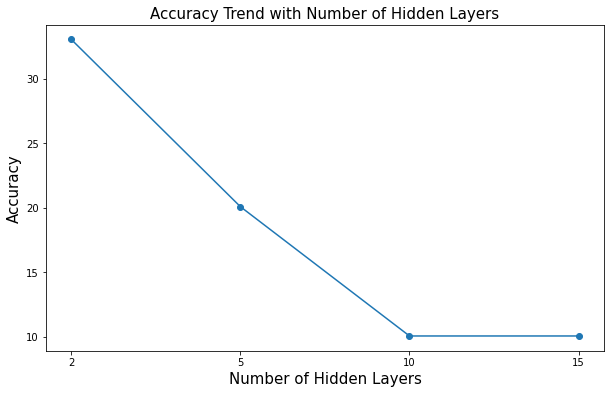

In [311]:
a=[test_accuracy*100,test_accuracy5*100,test_accuracy6*100,test_accuracy7*100]
b=['2','5','10','15']
plt.figure(figsize=(10, 6))
plt.plot(b,a,marker='o')
plt.title('Accuracy Trend with Number of Hidden Layers',fontsize=15)
plt.xlabel('Number of Hidden Layers',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.show()

In most cases, one would expect increasing the number of hidden layers in a deep network, and making it 'deeper' would improve the model and make it more accurate. However, increasing the number of hidden layers too much more than the required number of layers will cause accuracy in the test set to decrease. This happens, as the network tends to overfit to the training set,and unfortunately won't be able to generalize to new unseen data. That is the trend we see in the graph above as the accuracy decreases dramatically as we increase the number of hidden layers. 

Thus, we conclude the best model without added adjustments (like Dropout method, Pooling etc) is simply the first model with two hidden layers of 524 neurons each.

## Convolutional Neural Network 1

We will build our first CNN Model with the following sequence:

Input Layer &rarr; first Conv Layer &rarr; second Conv Layer &rarr; first Fully Connected Layer &rarr; second Fully Connected Layer &rarr; Output Layer (10 nodes and softmax activation function) 

For the output layer, we choose 10 nodes, as there are 10 possible catagories for the datapoints to be classified into. Softmax is chosen as the activation function in this layer as it is a multi-class classification. 

In [329]:
#Creating a new CNN model
CNN1=Sequential()
#Adding the first convolutional layer with 64 3x3 filters, and ReLU A.F after the input layer
CNN1.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
#Adding the second convolutional layer with 64 3x3 filters, and ReLU A.F.
CNN1.add(Conv2D(64,(3,3),activation='relu'))
#Flatten the data to a 1D vector
CNN1.add(Flatten())
#Adding the first fully connected layer with 512 units, and Sigmoid A.F.
CNN1.add(Dense(512,activation='sigmoid'))
#Adding the second convolutional layer with 512 units, and Sigmoid A.F.
CNN1.add(Dense(512,activation='sigmoid'))
#Adding the final output layer
CNN1.add(Dense(10,activation='softmax'))
CNN1.summary()

Now, we can compile the model and fit it to the training batches created earlier. The Loss, Metrics etc parameters are kept the same as for the MLP. 

In [330]:
CNN1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_44 (Flatten)        (None, 50176)             0         
                                                                 
 dense_205 (Dense)           (None, 512)               25690624  
                                                                 
 dense_206 (Dense)           (None, 512)               262656    
                                                                 
 dense_207 (Dense)           (None, 10)                5130      
                                                                 
Total params: 25,997,130
Trainable params: 25,997,130

In [331]:
history_CNN1 = CNN1.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))

Epoch 1/5
313/313 [==============================] - 91s 287ms/step - loss: 1.7756 - accuracy: 0.3405 - val_loss: 1.4566 - val_accuracy: 0.4745
Epoch 2/5
313/313 [==============================] - 91s 290ms/step - loss: 1.3187 - accuracy: 0.5161 - val_loss: 1.4074 - val_accuracy: 0.4966
Epoch 3/5
313/313 [==============================] - 92s 294ms/step - loss: 0.9575 - accuracy: 0.6634 - val_loss: 1.4510 - val_accuracy: 0.5163
Epoch 4/5
313/313 [==============================] - 114s 364ms/step - loss: 0.6167 - accuracy: 0.7947 - val_loss: 1.8547 - val_accuracy: 0.4620
Epoch 5/5
313/313 [==============================] - 38s 120ms/step - loss: 0.3997 - accuracy: 0.8708 - val_loss: 1.9211 - val_accuracy: 0.4854


The best training accuracy we obtained from the final epoch was 87.1% and the best validation accuracy was 48.5%. 

Now, we will plot graphs of the training accuracy and validation accuracy with the increase in epochs in one plot to view the trends:

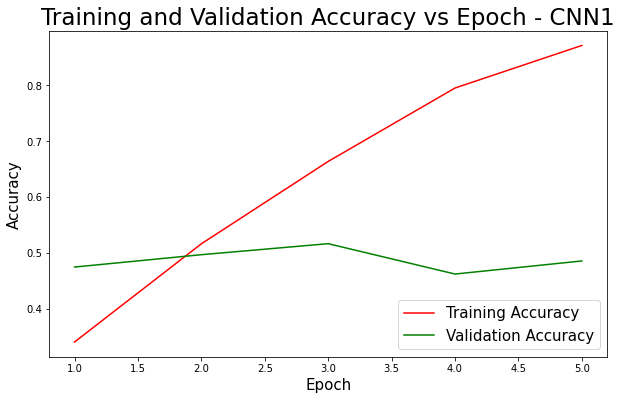

In [335]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5],history_CNN1.history['accuracy'],color='red')
plt.plot([1,2,3,4,5],history_CNN1.history['val_accuracy'],color='green')
plt.title('Training and Validation Accuracy vs Epoch - CNN1',fontsize='23')
plt.ylabel('Accuracy',fontsize='15')
plt.xlabel('Epoch',fontsize='15')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right',fontsize='15')
plt.show()

The graphs above show us the training accuracy increases almost linearly with the epochs. The validation accuracy has more of a constant accuracy during these 5 epochs. This huge gap between the training accuracy over the validation accuracy shows us we are having a big risk of overfitting, as the model fit well to the data it was trained on but did not perform well with the validation set.

We will now plot a similar graph for the trend in validation and training loss with increase in epochs:

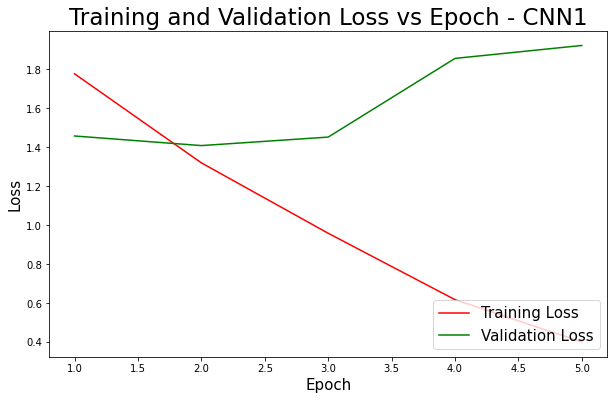

In [336]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5],history_CNN1.history['loss'],color='red')
plt.plot([1,2,3,4,5],history_CNN1.history['val_loss'],color='green')
plt.title('Training and Validation Loss vs Epoch - CNN1',fontsize='23')
plt.ylabel('Loss',fontsize='15')
plt.xlabel('Epoch',fontsize='15')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right',fontsize='15')
plt.show()

The gaph showing the Loss trend with increase in Epochs is as expected following the Accuracy trend we saw earlier. The validation loss does not decrease (in fact has a bit of an increase towards the end of the epochs), and the training loss decreases steadily. This, again, indicates the model is overfitting to the training dataset, but not able to perform well with the validation set. So it is not a good model.

Now, let us take a final look at the accuracy with the unseen test set:

In [337]:
test_loss_cnn1, test_accuracy_cnn1 = CNN1.evaluate(x_test,y_test) 
test_accuracy_cnn1*100

1250/1250 [==============================] - 32s 25ms/step - loss: 1.8947 - accuracy: 0.4943


49.434998631477356

The accuracy achieved by our first CNN model is 49.4%

## Convolutional Neural Network 2

We will build a second CNN Model with the following updated sequence:

Input Layer &rarr; first Conv Layer &rarr;  2x2 Pooling Layer &rarr; second Conv Layer &rarr; 2x2 Pooling Layer &rarr; first Fully Connected Layer &rarr; Dropout Layer &rarr; second Fully Connected Layer &rarr; Dropout Layer &rarr; Output Layer (10 nodes and softmax activation function) 

For the output layer, we choose 10 nodes, as there are 10 possible catagories for the datapoints to be classified into. Softmax is chosen as the activation function in this layer as it is a multi-class classification. 

In [349]:
#Creating a new CNN model
CNN2=Sequential()
#Adding the first convolutional layer with 64 3x3 filters, and ReLU A.F after the input layer
CNN2.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
#Adding a max pooling layer
CNN2.add(MaxPooling2D((2, 2)))
#Adding the second convolutional layer with 64 3x3 filters, and ReLU A.F.
CNN2.add(Conv2D(64,(3,3),activation='relu'))
#Adding a max pooling layer
CNN2.add(MaxPooling2D((2, 2)))
#Flatten the data to a 1D vector
CNN2.add(Flatten())
#Adding the first fully connected layer with 512 units, and Sigmoid A.F.
CNN2.add(Dense(512,activation='sigmoid'))
#Adding a Dropout Layer
CNN2.add(Dropout(0.2))
#Adding the second convolutional layer with 512 units, and Sigmoid A.F.
CNN2.add(Dense(512,activation='sigmoid'))
#Adding a Dropout Layer
CNN2.add(Dropout(0.2))
#Adding the final output layer
CNN2.add(Dense(10,activation='softmax'))
CNN2.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_47 (Flatten)        (None, 2304)              0         
                                                                 
 dense_212 (Dense)           (None, 512)             

When compared to the first CNN model, this one has added two extra features which are expcted to improve the model. 

Firstly, Dropout is added between all fully connected layers. It randomly drops a percentage of neurons (20% in this case) from the initially fully network which prevents all neurons in a layer from synchronously optimizing their weights. This is an effective and cheap way to prevent overfitting and increases generalization capabilities of the model. 

Secondly, a max pooling layer is added after each convolutional layer. Although it is unclear why, since pooling is not a layer which learns in a way that other building blocks of a deep network do, it significantly improves a model's performance. It learns the rotational and positional invariance of features and also does dimension reduction, as it cuts down on a lot of excessive data. It reduces overfitting, and overall computational cost due to the dimension reduction. In 2x2 Max Pooling, a 2x2 feature map only extracts the maximum element to pass on. 

Now, we can compile the model and fit it to the training batches created earlier. The Loss, Metrics etc parameters are kept the same as for the MLP.

In [352]:
CNN2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN2 = CNN2.fit(train_batch,epochs=5,validation_data=(x_validation,y_validation))

Epoch 1/5
313/313 [==============================] - 12s 37ms/step - loss: 1.9831 - accuracy: 0.2646 - val_loss: 1.7820 - val_accuracy: 0.3504
Epoch 2/5
313/313 [==============================] - 12s 38ms/step - loss: 1.5714 - accuracy: 0.4170 - val_loss: 1.4984 - val_accuracy: 0.4542
Epoch 3/5
313/313 [==============================] - 12s 40ms/step - loss: 1.4024 - accuracy: 0.4859 - val_loss: 1.4251 - val_accuracy: 0.4842
Epoch 4/5
313/313 [==============================] - 12s 40ms/step - loss: 1.2761 - accuracy: 0.5333 - val_loss: 1.3648 - val_accuracy: 0.5117
Epoch 5/5
313/313 [==============================] - 11s 36ms/step - loss: 1.1561 - accuracy: 0.5818 - val_loss: 1.3368 - val_accuracy: 0.5241


The best training accuracy we obtained from the final epoch was 58.2% and the best validation accuracy was 52.4%. 

Now, we will plot graphs of the training accuracy and validation accuracy with the increase in epochs in one plot to view the trends:

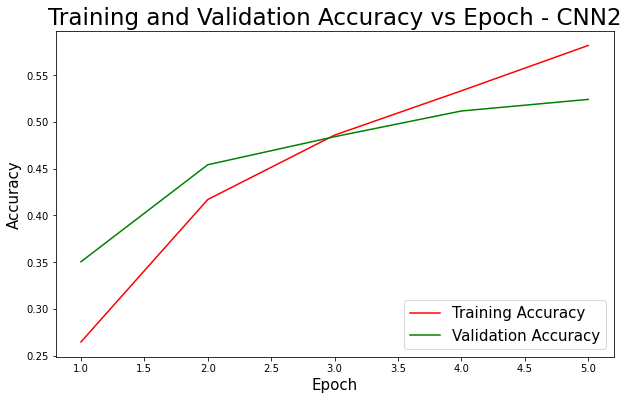

In [353]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5],history_CNN2.history['accuracy'],color='red')
plt.plot([1,2,3,4,5],history_CNN2.history['val_accuracy'],color='green')
plt.title('Training and Validation Accuracy vs Epoch - CNN2',fontsize='23')
plt.ylabel('Accuracy',fontsize='15')
plt.xlabel('Epoch',fontsize='15')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right',fontsize='15')
plt.show()

The graph above shows a similar trend in increase of accuracy for the training set, as we increase the number of epochs as in the first CNN model. The noticeable improvement from the first CNN model is the significantly smaller generalization gap between the training and validation accuracy. This indicates low chance of overfitting, so this is a much better model than the first CNN. 

We will now plot a similar graph for the trend in validation and training loss with increase in epochs:

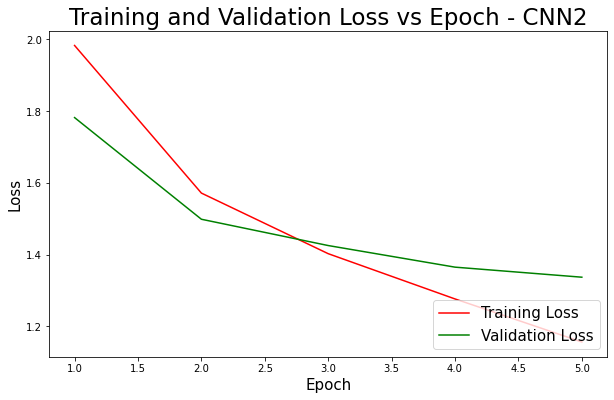

In [354]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5],history_CNN2.history['loss'],color='red')
plt.plot([1,2,3,4,5],history_CNN2.history['val_loss'],color='green')
plt.title('Training and Validation Loss vs Epoch - CNN2',fontsize='23')
plt.ylabel('Loss',fontsize='15')
plt.xlabel('Epoch',fontsize='15')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right',fontsize='15')
plt.show()

Again, we see the small generalization gap and both training loss and validation loss decreasing with the number of Epochs, which is a good sign indeed. 

We take a final look at the accuracy with the unseen test set:

In [355]:
test_loss_cnn2, test_accuracy_cnn2 = CNN2.evaluate(x_test,y_test) 
test_accuracy_cnn2*100

1250/1250 [==============================] - 18s 14ms/step - loss: 1.3557 - accuracy: 0.5214


52.139997482299805

The accuracy achieved by our second CNN model is 52.1%

Although this might not seem like a huge jump from the first CNN model, it is still a better performance due to the much smaller generalization gap and less chance of overfitting in this second improved model.

The second CNN model also has faster training time due to the dropout layers. We expect it to further decrease, along with the chance of overfitting if we further increased the dropout rate from 0.2 to 0.5.

We also expect the accuracies to increase if we add more epochs, to a certain extent. After a certain epoch, the improvement would be very miniscule and not worth the extra computation time and space. 

For further improvement, we would build on this final CNN model, as it has superior results to the MLP and first CNN model. We would increase the dropout rate to 0.5, to further decrease overfitting. We would also try increasing the epochs from 5 to 25 to see where the improvement tapers off. There does not seem to be any improvement of adding number of hidden layers or number of neurons in the hidden layer, as per our results from the MLP analysis, so we would not try that ammendment. If possible, we would also train with more data, although this is not a change to the architecture. 